In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from utils.plot_utils import set_fontsize
from utils.binning_utils import bin_dataset_switching
from utils.hdf_utils import load_measurement_data_devices_attrs
from utils.plot_utils import plot_binned_dataset_switching
from utils.binning_utils import bin_data, find_nearest_idx, combine_arrays_irregular, \
                                average_binned_data, bin_dataset_switching

In [2]:
fname = "2020_11_3.hdf"
dset_name = "1604436117 detection laser height scan"

dset_names = [dset_name]
devices = ('Laser Lock', 'Wavelength', 'ZaberTMM')

In [3]:
pmt_channel = 1
pxie, pxie_time, pxie_attrs, data_devices = load_measurement_data_devices_attrs(fname, dset_name, devices)

In [4]:
pmt_data = np.array([pxie[idx][:,pmt_channel] for idx in range(1, len(pxie)+1)])

In [8]:
pmt_data = pmt_data.reshape(-1,20,2000)

first shots were acidentally done with PMT voltage off

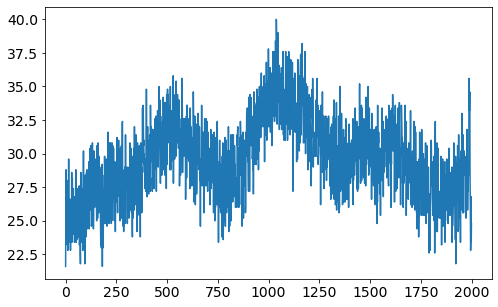

In [11]:
fig, ax = plt.subplots(figsize = (8,5))

ax.plot(np.mean(pmt_data[0], axis = 0))

set_fontsize(ax, 14)

In [12]:
pmt_data = pmt_data[1:]

pos 1     : 60887.94 +/- 4248.13
pos 2     : 50156.75 +/- 4494.33
pos 3     : 54614.05 +/- 5146.92
pos 4     :     0.00 +/- 0.00
pos 4     :     0.00 +/- 0.00
pos 1     : 73683.23 +/- 4556.23
pos 5     : 60663.64 +/- 4099.99
pos 6     : 62820.57 +/- 3809.33
pos 7     : 35899.53 +/- 3613.62


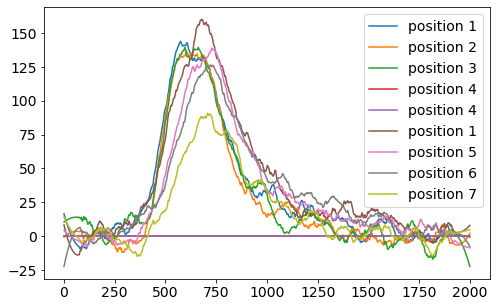

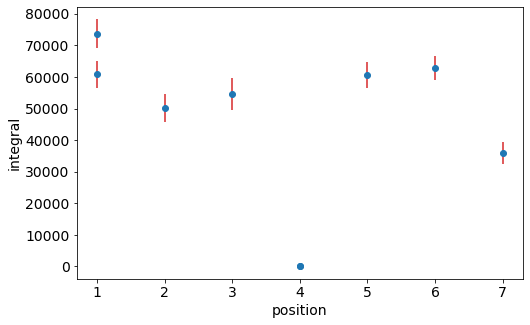

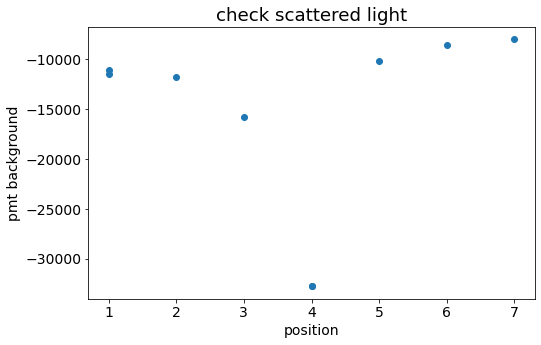

In [32]:
positions = [1,2,3,4,4,1,5,6,7]

fig, ax = plt.subplots(figsize = (8,5))
for idx, p in enumerate(positions):
    vals = pmt_data[idx]
    dat = -np.mean(vals, axis = 0)
    dat -= np.mean(np.append(dat[:250], dat[-250:]))
    ax.plot(savgol_filter(dat, 151,2), label = f'position {p}')
ax.legend(fontsize = 14)
set_fontsize(ax, 14)

fig, ax = plt.subplots(figsize = (8,5))
for idx, p in enumerate(positions):
    vals = pmt_data[idx]
    dat = -np.mean(vals, axis = 0)
    dat -= np.mean(np.append(dat[:250], dat[-250:]))
    std = np.std(vals, axis = 0)
    trapz_error = np.sqrt(np.sum((std)**2))
    ax.errorbar(p, np.trapz(dat), yerr = trapz_error, fmt = '.', ms = 12, color = 'C0', ecolor = 'C3')
    print(f'pos {p:<6}: {np.trapz(dat):>8.2f} +/- {trapz_error:.2f}')

ax.set_ylabel('integral')
ax.set_xlabel('position')
set_fontsize(ax, 14)

fig, ax = plt.subplots(figsize = (8,5))
for idx, p in enumerate(positions):
    vals = pmt_data[idx]
    ax.plot(p, vals.mean(axis = 0)[:250].mean(), '.', color = 'C0', ms = 12)
    
ax.set_xlabel('position')
ax.set_ylabel('pmt background')
ax.set_title('check scattered light')
set_fontsize(ax, 14)